In [27]:
import json
from sqlalchemy import create_engine
import pandas as pd
import geopandas as gpd

In [8]:
creds = json.load(open('dbcreds.json','r'))
engine = create_engine(f"postgresql://{creds['DB_USER']}:{creds['DB_PW']}@{creds['DB_SERVER']}:{creds['DB_PORT']}/{creds['DB_DBNAME']}")

In [9]:
s1 = "select ST_Y(geometry) as lat, ST_X(geometry) as lon from (select distinct geometry from imd_data) as a"

In [23]:
df = pd.read_sql(s1, con=engine)

In [24]:
df

,lat,lon
0,27.00,80.50
1,18.75,78.25
2,22.25,79.00
3,23.50,69.75
4,28.50,97.50
...,...,...
5012,17.50,76.75
5013,19.75,75.75
5014,11.25,78.75
5015,17.25,79.50


In [25]:
# make sr column, starting with 1
df.index.name = 'sr'
df.reset_index(drop=False, inplace=True)
df['sr'] += 1
df

,sr,lat,lon
0,1,27.00,80.50
1,2,18.75,78.25
2,3,22.25,79.00
3,4,23.50,69.75
4,5,28.50,97.50
...,...,...,...
5012,5013,17.50,76.75
5013,5014,19.75,75.75
5014,5015,11.25,78.75
5015,5016,17.25,79.50


In [26]:
# good to go
df.to_csv('grid_points.csv',index=False)

## let's also load these into the DB

In [28]:
s2 = "select distinct geometry from imd_data"

In [30]:
gdf1 = gpd.read_postgis(s2, con=engine, geom_col='geometry')

In [31]:
gdf1

,geometry
0,POINT (80.50000 27.00000)
1,POINT (78.25000 18.75000)
2,POINT (79.00000 22.25000)
3,POINT (69.75000 23.50000)
4,POINT (97.50000 28.50000)
...,...
5012,POINT (76.75000 17.50000)
5013,POINT (75.75000 19.75000)
5014,POINT (78.75000 11.25000)
5015,POINT (79.50000 17.25000)


<AxesSubplot:>

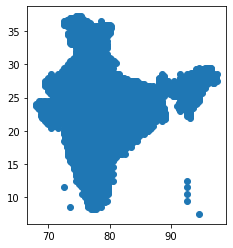

In [32]:
gdf1.plot()

In [34]:
gdf1.to_postgis('grid', con=engine, if_exists='append', index=False)